In [ ]:
# Marketing-Campaign.ipynb

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from data_prep import prep

sns.set(style="whitegrid")

In [ ]:
# Load and prepare data
df = prep("/content/marketing_campaign_data.csv")

print("Shape:", df.shape)
df.head()

Shape: (56000, 41)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Total_Purchases,Customer_Tenure_Days,Age_Band,Income_Band,Seg_High_Income,Seg_Young,Seg_Responder,Seg_High_Web,Seg_Family,Seg_High_Spender
0,342199,1985,Graduation,Together,59011.7,1,0,2012-11-17,3,0,...,13,4797,40-49,30-75k,0,0,0,0,1,0
1,8075450,1975,Master,Single,1730.0,1,1,2013-04-10,96,0,...,4,4653,50-59,<30k,0,0,0,0,1,0
2,13664263,1978,Graduation,Married,98584.6,0,0,2014-01-11,99,920,...,12,4377,40-49,75-150k,1,0,0,0,0,0
3,16164787,1976,Graduation,Married,74031.5,1,0,2014-06-18,47,265,...,16,4219,40-49,30-75k,0,0,0,0,1,0
4,15815139,1981,Graduation,Divorced,52784.2,1,1,2014-05-20,0,30,...,9,4248,40-49,30-75k,0,0,0,1,1,0


In [ ]:
df_raw = pd.read_csv("/content/marketing_campaign_data.csv", low_memory=False)

# Check which columns are object type
print(df_raw.dtypes)

# Inspect suspicious columns (like column 9 and 19)
print(df_raw.iloc[:,9].unique()[:20])   # first 20 unique values
print(df_raw.iloc[:,19].unique()[:20])

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Response                 int64
Complain                 int64
Country                 object
dtype: object
[   0  920  265   30  152   80    5   87 1493   94  223   42  483   17
  805  103   13  190  776   40]
[ 4  3  6  2  0

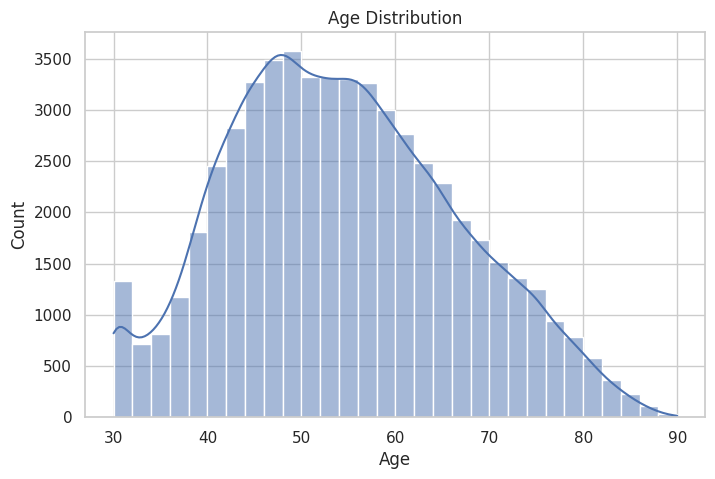

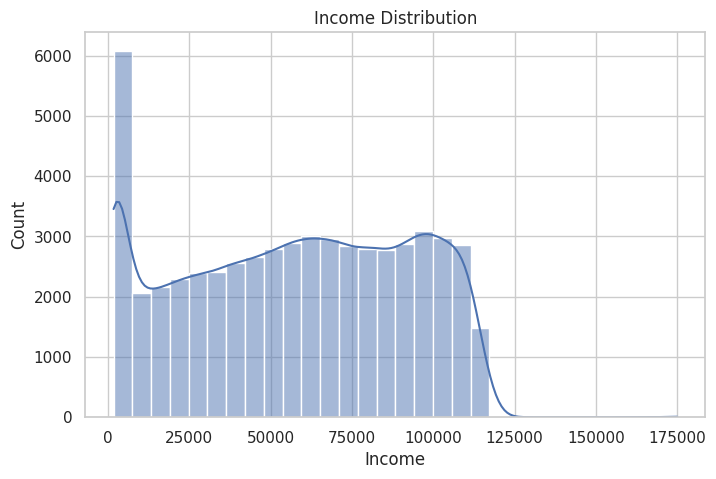

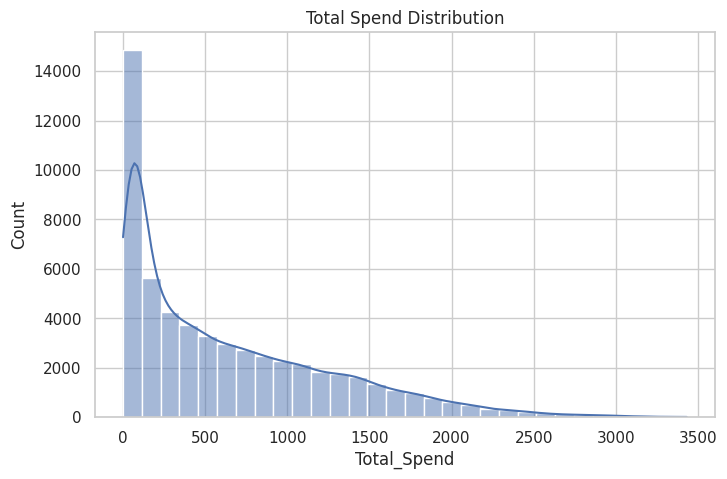

Overall Response Rate: 14.76%


In [ ]:
#Univariate analysis

# Age distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

# Income distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Income'], bins=30, kde=True)
plt.title("Income Distribution")
plt.show()

# Total Spend distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Total_Spend'], bins=30, kde=True)
plt.title("Total Spend Distribution")
plt.show()

# Response rate overall
print(f"Overall Response Rate: {df['Response'].mean():.2%}")

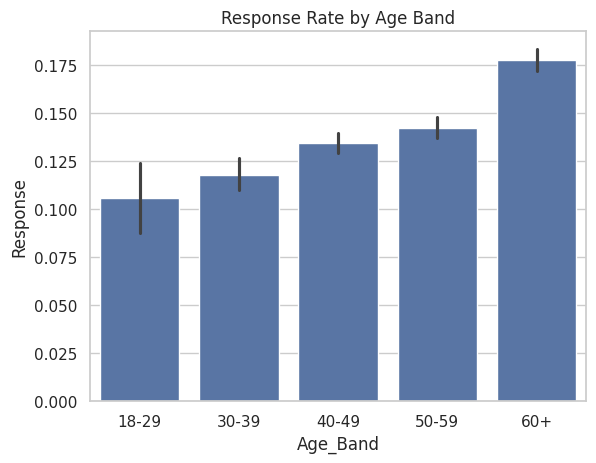

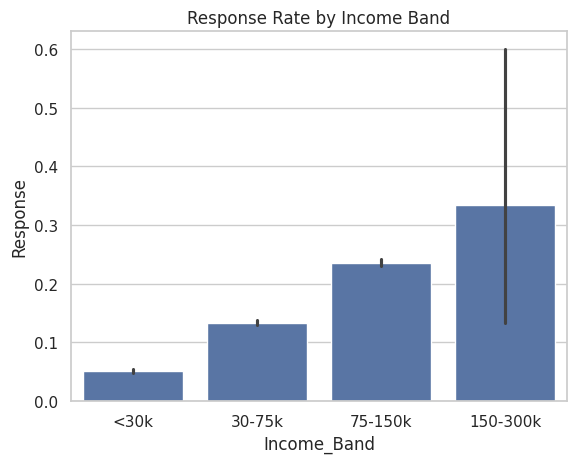

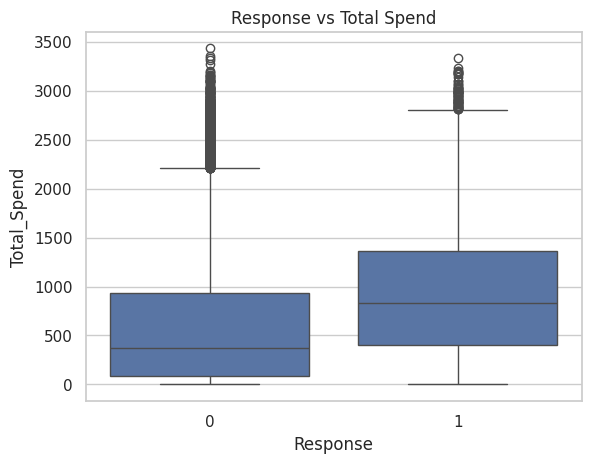

          NumWebPurchases  NumStorePurchases  NumCatalogPurchases  \
Response                                                            
0                4.114214           4.553137             1.983702   
1                5.026739           5.591652             2.844525   

          NumDealsPurchases  
Response                     
0                  2.184100  
1                  2.101875  


In [ ]:
#Bivariate analysis

# Response vs Age Band
sns.barplot(x='Age_Band', y='Response', data=df)
plt.title("Response Rate by Age Band")
plt.show()

# Response vs Income Band
sns.barplot(x='Income_Band', y='Response', data=df)
plt.title("Response Rate by Income Band")
plt.show()

# Response vs Total Spend
sns.boxplot(x='Response', y='Total_Spend', data=df)
plt.title("Response vs Total Spend")
plt.show()

# Channel usage vs Response
channels = ['NumWebPurchases','NumStorePurchases','NumCatalogPurchases','NumDealsPurchases']
print(df.groupby('Response')[channels].mean())

In [ ]:
#multivariate analysis

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

# Campaign acceptance rates
cmp_cols = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']
df[cmp_cols].mean().plot(kind='bar', figsize=(8,5))
plt.title("Campaign Acceptance Rates")
plt.ylabel("Acceptance Rate")
plt.show()

In [ ]:
segment_cols = ['Seg_High_Income','Seg_Young','Seg_Responder',
                'Seg_High_Web','Seg_Family','Seg_High_Spender']

overall_rate = df['Response'].mean()
print("Overall Response Rate:", f"{overall_rate:.2%}")

for seg in segment_cols:
    rate = df.loc[df[seg]==1, 'Response'].mean()
    print(f"{seg}: {rate:.2%} vs overall {overall_rate:.2%}")

Overall Response Rate: 14.76%
Seg_High_Income: 23.54% vs overall 14.76%
Seg_Young: nan% vs overall 14.76%
Seg_Responder: 100.00% vs overall 14.76%
Seg_High_Web: 12.07% vs overall 14.76%
Seg_Family: 11.62% vs overall 14.76%
Seg_High_Spender: 26.04% vs overall 14.76%


In [ ]:
# Export cleaned dataset for SQL/dashboard
df.to_csv("cleaned_customers.csv", index=False)
print("✅ Cleaned dataset exported to data/cleaned_customers.csv")

✅ Cleaned dataset exported to data/cleaned_customers.csv
